# Group Activity Week 6: Jeopardy!

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

jeopardy_path = "JEOPARDY_CSV.csv"
jeopardy_df = pd.read_csv(jeopardy_path)

print(type(jeopardy_df))

<class 'pandas.core.frame.DataFrame'>


### 1(a). How many rows are in the dataframe and what does each row represent? What is the "grain"?

There are 216930 rows in the dataframe, and each row represents a question asked on one instance of a show.

In [125]:
jeopardy_df.shape

(216930, 7)

### 1(b). What is "dirty" about this data and how would you clean it?

In terms of being "dirty," the data has a few null values that should be replaced with "0", the "Air Date" column
isn't in ISO format (hard to sort), and the column names have extra spaces in them, which introduces errors into code
where we expect there not to be spaces.

I cleaned it by using the .isnull method to show whether there are null values and if so, where they are located. Then I used the .fillna method to fill empty values with 0's so they wouldn't throw off any data calculations or groupings. Finally, I changed the format of the values in the "Air Date" column so that the year came first, for easier sorting.

In [126]:
np.where(pd.isnull(jeopardy_df))

(array([ 94817, 143297]), array([6, 6]))

In [127]:
jeopardy_df.fillna(0)

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
...,...,...,...,...,...,...,...
216925,4999,5/11/2006,Double Jeopardy!,RIDDLE ME THIS,"$2,000",This Puccini opera turns on the solution to 3 ...,Turandot
216926,4999,5/11/2006,Double Jeopardy!,"""T"" BIRDS","$2,000",In North America this term is properly applied...,a titmouse
216927,4999,5/11/2006,Double Jeopardy!,AUTHORS IN THEIR YOUTH,"$2,000","In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker
216928,4999,5/11/2006,Double Jeopardy!,QUOTATIONS,"$2,000","From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo


In [128]:
jeopardy_df[' Air Date']=pd.to_datetime(jeopardy_df[' Air Date'])

In [129]:
jeopardy_df.rename(columns = {' Air Date' : 'Air Date', ' Round' : 'Round', ' Category':'Category', ' Answer':'Answer'}, inplace = True)


In [84]:
jeopardy_df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


### 1(c). How many unique shows were there each year?

In [130]:
jeopardy_df['Year'] = pd.DatetimeIndex(jeopardy_df['Air Date']).year
jeopardy_df['Month'] = pd.DatetimeIndex(jeopardy_df['Air Date']).month

jeo_df_unique_shows = jeopardy_df.drop_duplicates(subset = "Show Number")
jeo_df_unique_shows = jeo_df_unique_shows.sort_index(level=["Air Date"])
jeo_df_unique_shows_yr = jeo_df_unique_shows["Year"].value_counts().sort_index()
jeo_df_unique_shows_yr = pd.DataFrame(jeo_df_unique_shows_yr)
jeo_df_unique_shows_yr

,Year
1984,23
1985,16
1986,25
1987,22
1988,22
1989,36
1990,73
1991,24
1992,32
1993,35


### 1(d). How many times was each question category used overall?

In [131]:
jeopardy_df_cat = jeopardy_df["Category"].value_counts()
jeopardy_df_cat_no = pd.DataFrame(jeopardy_df_cat)
jeopardy_df_cat_no.head(50)

,Category
BEFORE & AFTER,547
SCIENCE,519
LITERATURE,496
AMERICAN HISTORY,418
POTPOURRI,401
WORLD HISTORY,377
WORD ORIGINS,371
COLLEGES & UNIVERSITIES,351
HISTORY,349
SPORTS,342


### 1(e). Which month over the years has had the most shows?

Over the years, the month of November (month 11) has had the most shows.

In [132]:
jeo_df_unique_shows_per_mo = jeo_df_unique_shows["Month"].value_counts(ascending=False)
jeo_df_unique_shows_per_mo = pd.DataFrame(jeo_df_unique_shows_per_mo)
jeo_df_unique_shows_per_mo

,Month
11,434
1,355
12,352
5,351
10,347
4,330
3,329
6,321
2,293
9,272


### 1(f). Are there any answers that appeared multiple times? Find the top three most common answers.

The three most common answers to Jeopardy were "China," (216 answers) "Australia," (215 answers) and "Japan" (196 answers).

In [133]:
jeopardy_df_ans = jeopardy_df["Answer"].value_counts(ascending=False)
top_three_answers = pd.DataFrame(jeopardy_df_ans.head(3))
top_three_answers

,Answer
China,216
Australia,215
Japan,196


### 2. Create a visualization that shows the top 5 categories.

In [158]:
jeopardy_df_cat = jeopardy_df["Category"].value_counts()
jeopardy_df_cat = pd.DataFrame(jeopardy_df_cat)
jeopardy_df_cat_top_five = jeopardy_df_cat.nlargest(5,"Category")
jeopardy_df_cat_top_five

,Category
BEFORE & AFTER,547
SCIENCE,519
LITERATURE,496
AMERICAN HISTORY,418
POTPOURRI,401


In [156]:
jeopardy_df_cat_no.shape

(27983, 1)

Text(0.5, 0, 'Number of Questions Asked From Category')

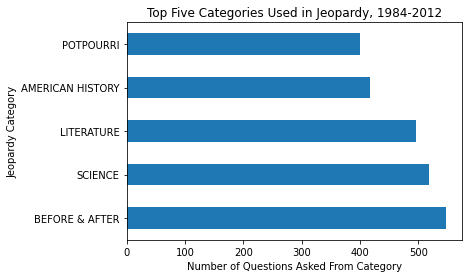

In [159]:
jeopardy_df_cat_top_five.plot(kind="barh", title = "Top Five Categories Used in Jeopardy, 1984-2012",legend=False)
plt.ylabel("Jeopardy Category")
plt.xlabel("Number of Questions Asked From Category")